In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # 시각화 라이브러리

# 1. 문제정의
- 생존자/사망자 예측
- kaggle대회 높은 점수를 획득

# 2. 데이터 수집
- kaggle 사이트로부터 train, test 수집

In [4]:
train=pd.read_csv('./titanic/train.csv')
test=pd.read_csv('./titanic/test.csv')

# 3. 데이터 전처리

In [5]:
# PassengerId를 인덱스로 변경하기
# pd.read.csv('./titanic/train.csv', index_col='PassengerId')
train = train.set_index('PassengerId')
test = test.set_index('PassengerId')

In [6]:
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


In [7]:
# 결측치 확인
train.info()
# Age, Cabin, Embarked 결측치 있음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
test.info()
# Age, Fare, Cabin 결측치 있음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [9]:
# train - embarked 결측치 채우기
# .value.counts() : 컬럼에 몇개의 값이 있는지 각각의 개수 확인
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
# 최빈값으로 결측치 채우기
# Embarked 컬럼에 S가 갖는 비율이 높음(70% 이상)
# 2개의 결측치이기 때문에 학습에 큰 영향을 끼치지 않음
# fillna('결측치에 채울 값') - 결측치 채우기
train['Embarked']=train['Embarked'].fillna('S')
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
# train, test의 Age 채우기
# 다른 컬럼간의 상관관계를 통해서 결측치를 채워보자
# Age와 다른 컬럼간의 상관관계 알아보기
# corr: 상관관계 알아보기
# -1 ~ 1까지의 값을 가진다. 상관계수...
# 절댓값이 1에 가까울수록 두 컬럼간의 상관관계가 높다.
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [12]:
# Age - 객실등급(Pclass), 성별(Sex)
# 두 개의 인덱스를 가진 테이블
pt1=train.pivot_table(values='Age', # 궁금한 값
                 index=['Pclass','Sex'], # 기준값
                  aggfunc='mean' # 출력할 값
                 )
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [13]:
# 인덱스 두개 입력
pt1.loc[3,'female']

Age    21.75
Name: (3, female), dtype: float64

In [14]:
# apply: 행/열 단위 작업할때 사용
# np.isnan: 결측치면 True, 아니면 False
# loc
# astype: Series의 타입 변경

In [15]:
np.isnan(train['Age'])

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889     True
890    False
891    False
Name: Age, Length: 891, dtype: bool

In [16]:
def fill_age(data):
    # 나이가 결측치인지 아닌지
    # 나이가 결측치라면 pt1 값을 가져오고
    if np.isnan(data['Age']):
        return pt1.loc[data['Pclass'],data['Sex']][0]
    # 나이가 결측치가 아니면 그 값을 그대로 사용
    else :
        return data['Age']

In [17]:
train['Age']=train.apply(fill_age, axis=1).astype('int')

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int32  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 80.1+ KB


In [19]:
test['Age']=test.apply(fill_age, axis=1).astype('int')
test.info

<bound method DataFrame.info of              Pclass                                          Name     Sex  \
PassengerId                                                                 
892               3                              Kelly, Mr. James    male   
893               3              Wilkes, Mrs. James (Ellen Needs)  female   
894               2                     Myles, Mr. Thomas Francis    male   
895               3                              Wirz, Mr. Albert    male   
896               3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
...             ...                                           ...     ...   
1305              3                            Spector, Mr. Woolf    male   
1306              1                  Oliva y Ocana, Dona. Fermina  female   
1307              3                  Saether, Mr. Simon Sivertsen    male   
1308              3                           Ware, Mr. Frederick    male   
1309              3                      Pet

In [20]:
# test-Fare
# 평균값
# fillna 활용
# 1. Fare값 출력하기
# train['Fare']
# 출력한 값의 평균 값 출력하기
# train['Fare'].mean
# 평균 값을 결측치에 적용
test['Fare'] = test['Fare'].fillna(32)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int32  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 34.3+ KB


In [21]:
# 피벗테이블을 활용해서 Fare결측치 채우기
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.066538,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.410104,0.083081,0.018443,-0.549500
Age,-0.066538,-0.410104,1.000000,-0.251439,-0.178855,0.120173
SibSp,-0.035322,0.083081,-0.251439,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.178855,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.120173,0.159651,0.216225,1.000000


In [22]:
# fare용 피벗테이블 생성
# Fare - 객실등급(Pclass), 성별(Sex)
pt2=train.pivot_table(values='Fare', # 궁금한 값
                 index=['Pclass','Sex'], # 기준값
                      # 기준값에는 결측치가 존재해선 안된다.
                  aggfunc='mean' # 출력할 값
                 )
pt2

Fare
Pclass Sex               
1      female  106.125798
       male     67.226127
2      female   21.970121
       male     19.741782
3      female   16.118810
       male     12.661633

In [23]:
# Fare에 있는 결측치행을 출력하기 위해서 불리언인덱싱
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


In [24]:
def fill_fare(data):
    # 나이가 결측치인지 아닌지 확인
    # 나이가 결측치라면 pt1 값을 가져오고
    if np.isnan(data['Fare']) :
        return pt2.loc[data['Pclass'],data['Sex']][0]
    # 나이가 결측치가 아니라면 그 값을 그대로 사용
    else :
        return data['Fare']

In [25]:
test['Fare']=test['Fare'].fillna(12.6)

In [26]:
test['Fare'] = test.apply(fill_fare, axis = 1).astype("int")
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    418 non-null    int64 
 1   Name      418 non-null    object
 2   Sex       418 non-null    object
 3   Age       418 non-null    int32 
 4   SibSp     418 non-null    int64 
 5   Parch     418 non-null    int64 
 6   Ticket    418 non-null    object
 7   Fare      418 non-null    int32 
 8   Cabin     91 non-null     object
 9   Embarked  418 non-null    object
dtypes: int32(2), int64(3), object(5)
memory usage: 32.7+ KB


In [27]:
# train, test-cabin 결측치 채우기
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [28]:
# Cabin
# 층별로 구분하기

In [29]:
# train['Cabin'] 컬럼에 각 값을 인덱싱
# 인덱싱을 하기 위해선 값들이 문자열이 되어야함 > str
# 문자열의 0번 인덱스를 가져오겠따 > [0]
train['Cabin']=train['Cabin'].str[0]
test['Cabin']=test['Cabin'].str[0]
# 모든 값을 층별로 구분

In [30]:
# 결측치 자체를 하나의 데이터로 활용
# 죽은 사람에겐 정보를 수집할 수 없음
# Cabin컬럼의 결측치가 위의 이유일 것이다
# 라는 가설을 세우고 모든 결측치를 하나의 문자로 채움
train['Cabin']=train['Cabin'].fillna('M')
test['Cabin']=test['Cabin'].fillna('M')

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int32  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 80.1+ KB


In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    418 non-null    int64 
 1   Name      418 non-null    object
 2   Sex       418 non-null    object
 3   Age       418 non-null    int32 
 4   SibSp     418 non-null    int64 
 5   Parch     418 non-null    int64 
 6   Ticket    418 non-null    object
 7   Fare      418 non-null    int32 
 8   Cabin     418 non-null    object
 9   Embarked  418 non-null    object
dtypes: int32(2), int64(3), object(5)
memory usage: 32.7+ KB


# 4. 탐색적 데이터 분석
- 시각화를 통해서 컬럼을 분석

<AxesSubplot:xlabel='Cabin', ylabel='count'>

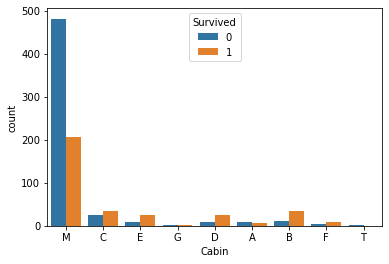

In [33]:
# Cabin
sns.countplot(data=train, # 사용할 데이터
              x='Cabin', # X축으로 사용할 컬럼
              hue='Survived') # count에 대한 기준

- M에서 상대적으로 많은 사람이 죽었따
- 위에서 세운 가설이 어느정도 성립
- 생존여부 판단에 활용해도 괜찮겠다

<AxesSubplot:xlabel='Pclass', ylabel='count'>

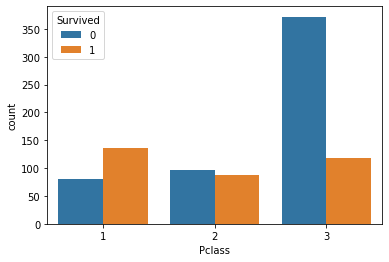

In [34]:
# Pclass
sns.countplot(data=train, # 사용할 데이터
              x='Pclass', # X축으로 사용할 컬럼
              hue='Survived') # count에 대한 기준

- 객실등급(Pclass)컬럼이 생존에 영향을 끼쳤다
- 3등급이 생존에 많은 차이를 보인다

<AxesSubplot:xlabel='Cabin', ylabel='count'>

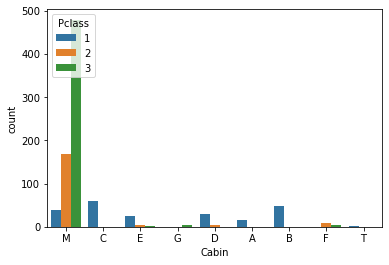

In [35]:
# Pclass Cabin컬럼 시각화
sns.countplot(data=train, # 사용할 데이터
              x='Cabin', # X축으로 사용할 컬럼
              hue='Pclass') # count에 대한 기준

<AxesSubplot:xlabel='Embarked', ylabel='count'>

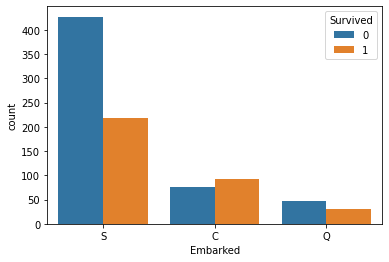

In [36]:
# Embarked
# 탑승위치별 생존
sns.countplot(data=train, # 사용할 데이터
              x='Embarked', # X축으로 사용할 컬럼
              hue='Survived') # count에 대한 기준

- S에서 탑승한 탑승객들은 많은 비율로 죽었다
- S(사우스햄튼)의 경제력이 낮아서 낮은 등급 객실을 타지 않았을까?

<AxesSubplot:xlabel='Sex', ylabel='Age'>

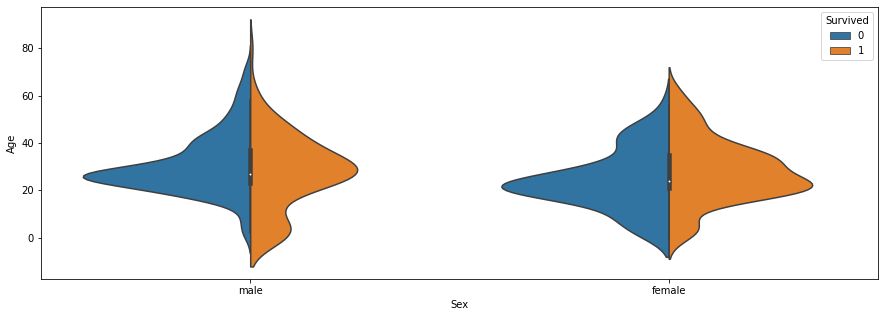

In [37]:
# Age 
# violinplot
plt.figure(figsize=(15,5))
sns.violinplot(data=train,
               x="Sex",
               y="Age",
               hue='Survived',
              split=True)

- 20대 초반에 사람들이 가장 많다
- 어린아이 중에서는 남자아이가 산 비율이 높다

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

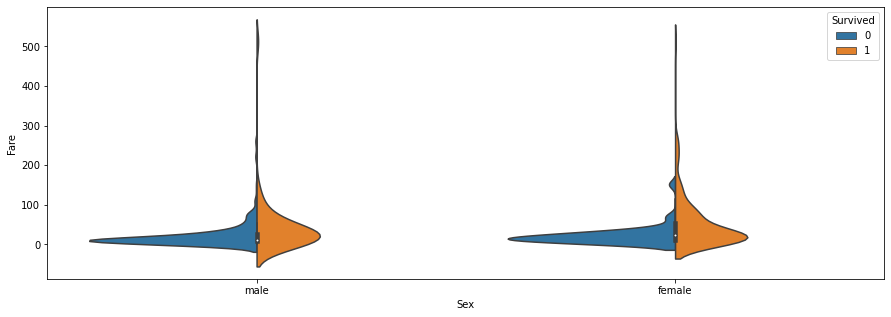

In [38]:
# Fare
plt.figure(figsize=(15,5))
sns.violinplot(data=train,
               x="Sex",
               y="Fare",
               hue='Survived',
              split=True)

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

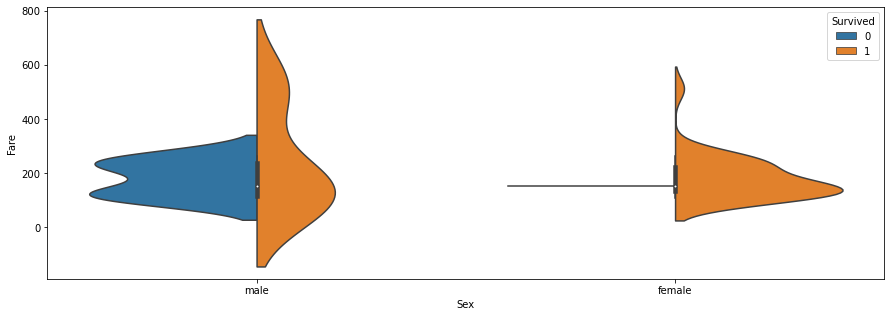

In [39]:
# ※ 100 count 이상만 시각화하고 싶을 경우
plt.figure(figsize=(15,5))
sns.violinplot(data=train[train['Fare']>=100],
               x="Sex",
               y="Fare",
               hue='Survived',
              split=True)

- 저렴한 객실에 승선한 사람들은 상대적으로 많이 죽었다

<AxesSubplot:xlabel='Family', ylabel='count'>

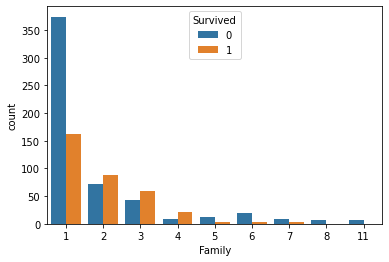

In [40]:
# Parch, SibSp - 부모자식, 형제자매
# 가족
# Family 새로운 특성을 생성
# 같이 승선한 가족의 수
# Family = Parch + SibSp + 1(본인)
train['Family']=train['Parch']+train['SibSp']+1
test['Family']=test['Parch']+test['SibSp']+1
sns.countplot(data=train,
              x='Family',
              hue='Survived')

In [41]:
# Family를 범주형으로 만들자
# 1: Alone
# 2~4: Small
# 5 이상: Large
bins=[0,1,4,11] # 범주형의 범위 지정
labels=['Alone','Small','Large'] # 범주형에 달아줄 이름
train['Family']=pd.cut(train['Family'], bins=bins, labels=labels)

In [42]:
test['Family']=pd.cut(test['Family'], bins=bins, labels=labels)

In [43]:
train['Family'].value_counts()

Alone    537
Small    292
Large     62
Name: Family, dtype: int64

In [44]:
temp = train['Name'].iloc[0]

In [45]:
temp.split(',')[1].split('.')[0].strip()

'Mr'

In [46]:
def split_name(data):
    return data.split(',')[1].split('.')[0].strip()

In [47]:
# axis=0: 열 단위로 작업(기본값)
train['Name']=train["Name"].apply(split_name)
test['Name']=test['Name'].apply(split_name)

In [48]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [49]:
# 컬럼 지우기
# train=train.drop('지울 컬럼이름',axis=1)

In [50]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family'],
      dtype='object')

In [51]:
train['Name'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Lady              1
Jonkheer          1
Ms                1
Capt              1
Don               1
the Countess      1
Mme               1
Name: Name, dtype: int64

In [52]:
Title_Dictionary = {
    "Capt": "Other",
    "Col": "Other",
    "Major": "Other",
    "Jonkheer": "Other",
    "Don": "Other",
    "Sir" : "Other",
    "Dr": "Dr",
    "Rev": "Rev",
    "the Countess":"Other",
    "Mme": "Other",
    "Mlle": "Other",
    "Ms": "Other",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Other"
}

In [53]:
# map 함수를 활용해서 라벨인코딩 
train['Name'].map(Title_Dictionary).value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      14
Dr          7
Rev         6
Name: Name, dtype: int64

In [54]:
train['Name']=train['Name'].map(Title_Dictionary)
test['Name']=test['Name'].map(Title_Dictionary)

<AxesSubplot:xlabel='Name', ylabel='count'>

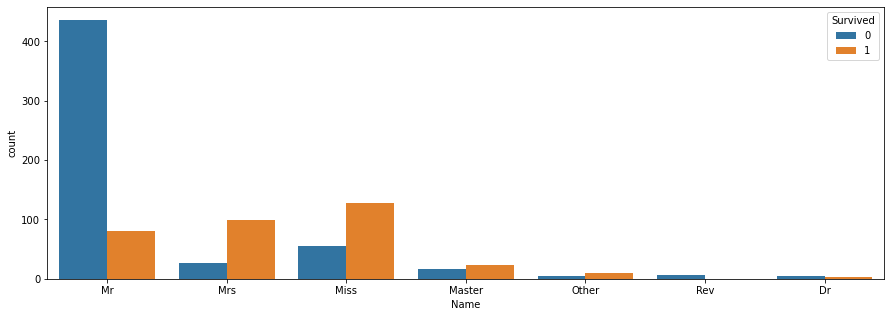

In [55]:
plt.figure(figsize=(15,5))
sns.countplot(data=train, x='Name',hue='Survived')

In [56]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family'],
      dtype='object')

In [57]:
train['Ticket']

PassengerId
1             A/5 21171
2              PC 17599
3      STON/O2. 3101282
4                113803
5                373450
             ...       
887              211536
888              112053
889          W./C. 6607
890              111369
891              370376
Name: Ticket, Length: 891, dtype: object

In [58]:
# ticket 삭제
# 유의미한 결과를 출력하기 힘들것이라고 판단해서
train.drop('Ticket',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)

In [59]:
# 원핫 인코딩
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       891 non-null    int32   
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Fare      891 non-null    float64 
 8   Cabin     891 non-null    object  
 9   Embarked  891 non-null    object  
 10  Family    891 non-null    category
dtypes: category(1), float64(1), int32(1), int64(4), object(4)
memory usage: 114.1+ KB


In [60]:
onehot_column=['Name','Sex','Cabin','Embarked','Family']

In [61]:
# prefix: 원핫인코딩 후 어디서 파생된 컬럼인지 확인
pd.get_dummies(train['Name'],prefix="Name")

,Name_Dr,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Other,Name_Rev
PassengerId,,,,,,,
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0
5,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
887,0,0,0,0,0,0,1
888,0,0,1,0,0,0,0
889,0,0,1,0,0,0,0


In [62]:
for col in onehot_column:
    # 원핫인코딩한 컬럼 변수에 저장
    dummy=pd.get_dummies(train[col],prefix=col)
    
    # 원핫인코딩된 결과물을 기존의 자료와 합치기
    train=pd.concat([train,dummy],axis=1)
    
    # 원핫인코딩 진행한 글자형 컬럼 삭제
    train.drop(col,axis=1,inplace=True)

In [63]:
for col in onehot_column:
    # 원핫인코딩한 컬럼 변수에 저장
    dummy=pd.get_dummies(test[col],prefix=col)
    
    # 원핫인코딩된 결과물을 기존의 자료와 합치기
    test=pd.concat([test,dummy],axis=1)
    
    # 원핫인코딩 진행한 글자형 컬럼 삭제
    test.drop(col,axis=1,inplace=True)

In [64]:
print(train.shape)
print(test.shape)

(891, 30)
(418, 28)


In [65]:
# test가 가지고 있는 컬럼 - train이 가지고 있는 컬럼
# test에는 있고 train에는 없는 것
set(test.columns)-set(train.columns)

set()

In [66]:
# train이 가지고 있는 컬럼 - test가 가지고 있는 컬럼
# train에는 있고 test에는 없는 것
set(train.columns)-set(test.columns)

{'Cabin_T', 'Survived'}

In [67]:
# 기존 test에 Cabin 컬럼에 T라는 값이 없기 때문에 원핫인코딩 진행때 Cabin_T컬럼 생성되지 않았다.
# Cabin_T 컬럼에는 모두 0의 값을 집어넣어줌
test['Cabin_T']=0

In [68]:
print(train.shape)
print(test.shape)

(891, 30)
(418, 29)


# 5. 모델 선택 및 하이퍼파라미터 튜닝

In [69]:
# 훈련(train), 평가(test) 데이터를 문제(X)와 정답(y)으로 분리
# X_train, y_train, X_test
X_train=train.drop('Survived', axis=1)
y_train=train['Survived']
X_test=test.copy()

In [70]:
X_train.shape, X_test.shape, y_train.shape

((891, 29), (418, 29), (891,))

In [71]:
# DecisionTree - 과대적합이 많이 걸리는 모델이라 나중에는 사용되지 않을거다
from sklearn.tree import DecisionTreeClassifier

In [72]:
tree=DecisionTreeClassifier(max_depth=4)

In [73]:
# 교차검증
from sklearn.model_selection import cross_val_score

In [74]:
result=cross_val_score(tree, X_train, y_train, cv=5)
result.mean()

0.8192831586215554

In [75]:
result

array([0.83798883, 0.80337079, 0.80337079, 0.79213483, 0.85955056])

# 6. 학습

In [76]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

# 7. 평가

In [77]:
tree.score(X_train,y_train)

0.8439955106621774

In [78]:
# X_test를 통해서 예측값 출력하기
pre=tree.predict(X_test)

In [79]:
result=pd.read_csv('titanic/gender_submission.csv')

In [80]:
# result에 survived컬럼을 예측한 값으로 채우자
result['Survived']=pre

In [81]:
# result를 csv파일로 저장
result.to_csv('DT_submission_01.csv', index=False)

# 5-1
- RandomForest

In [82]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000,
                                # tree의 개수
        max_features=0.7, # 각각의 트리에서 사용할 특성의 개수
        max_depth=5,
        min_samples_leaf=15,
        max_leaf_nodes=50)

In [83]:
# GridSearch
# 여러개의 파라미터를 한번에 튜닝하는 방법
# 교차검증을 같이 진행
from sklearn.model_selection import GridSearchCV

In [84]:
param_grid={
    'max_depth':[5,10,15,20],
    'n_estimators':[1000,1500,2000,2500],
    'max_features':[0.5,0.7],
    'max_leaf_nodes':[20,50,80],
    'min_samples_leaf':[10,15,20]
    
}

In [85]:
grid=GridSearchCV(forest, # gridSearch에 사용할 모델
                 param_grid, # 튜닝할 매개변수
                 cv=3, # k겹 교차검증
                    verbose=2 # 현재 진행 중인 학습 열람
                 )

In [86]:
# 4*4*2*3*3=288번의 학습중에 제일 잘 나온 걸 찾는
# grid.fit(X_train, y_train) 너무 오래 걸려서 주석 처리

In [87]:
# # 최적의 파라미터
# print('최적의 파라미터 : ',grid.best_params_)
# # 최적의 예측점수
# print('최고 예측 점수 : ',grid.best_score_)

# 6-1

In [88]:
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=0.7, max_leaf_nodes=50,
                       min_samples_leaf=15, n_estimators=1000)

# 7-1

In [89]:
pre=forest.predict(X_test)
result=pd.read_csv('titanic/gender_submission.csv')
result['Survived']=pre
result.to_csv('forest_submission_01.csv', index=False)

# 5-2
- KNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [91]:
# 스케일러 적용 전
result=cross_val_score(knn, X_train, y_train, cv=5)
result.mean()

0.7216935534492499

In [103]:
# standardScaler받아오기
from sklearn.preprocessing import StandardScaler

In [104]:
scaler= StandardScaler()

In [105]:
# 범위 학습
scaler.fit(X_train)

StandardScaler()

In [112]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Name_Dr,Name_Master,Name_Miss,Name_Mr,Name_Mrs,...,Cabin_F,Cabin_G,Cabin_M,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Family_Alone,Family_Small,Family_Large
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22,1,0,7.2500,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,1,38,1,0,71.2833,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,3,26,0,0,7.9250,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
4,1,35,1,0,53.1000,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
5,3,35,0,0,8.0500,0,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0


In [109]:
# 학습된 범위로 값 변환
# 평균이 0, 분산이 1인 상태로 바꾸는 게 standardScaler
# test도 똑같이 진행해주어야함!
trans_X_train=scaler.transform(X_train)
trans_X_test=scaler.transform(X_test)

In [111]:
result=cross_val_score(knn, trans_X_train, y_train, cv=5)
result.mean()

0.8046889711882492

# 6-2

In [92]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

# 7-2

In [93]:
knn.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

# 5-3
- voting

In [94]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(
    estimators=[
        ('knn_model',knn),
        ('tree_model',tree),
        ('forest_model',forest)
    ],
    voting='soft'
)

# 6-3

In [95]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('knn_model', KNeighborsClassifier()),
                             ('tree_model',
                              DecisionTreeClassifier(max_depth=4)),
                             ('forest_model',
                              RandomForestClassifier(max_depth=5,
                                                     max_features=0.7,
                                                     max_leaf_nodes=50,
                                                     min_samples_leaf=15,
                                                     n_estimators=1000))],
                 voting='soft')

# 7-3

In [96]:
pre=voting.predict(X_test)
result=pd.read_csv('titanic/gender_submission.csv')
result['Survived']=pre
result.to_csv('voting_submission_01.csv', index=False)

# 5-4
- adaboost

In [97]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier()

# 6-4

In [98]:
adaboost.fit(X_train,y_train)

AdaBoostClassifier()

# 7-4

In [99]:
pre=adaboost.predict(X_test)
result=pd.read_csv('titanic/gender_submission.csv')
result['Survived']=pre
result.to_csv('adaboost_submission_01.csv', index=False)

# 5-5
- GradientBoosting

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

# 6-5

In [101]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

# 7-5

In [102]:
pre = gbc.predict(X_test)
result = pd.read_csv('titanic/gender_submission.csv')
result['Survived'] = pre
result.to_csv('gbc_submission_01.csv',index = False)